# News Summarization Approaches for NLP

Text summarization in NLP is the process of summarizing the information in large texts for quicker consumption. In this notebook, I will walk you through the traditional extractive as well as the advanced generative methods to implement News summarization.

When you open news sites, do you just start reading every news article? Probably not. We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.
It is essential for the summary to be a fluent, continuous and depict the significant.

Text summarization methods can be grouped into two main categories: 
- Extractive 
- Abstractive 





# Extractive Text Summarization

 It is the traditional method developed first. The main objective is to identify the significant sentences of the text and add them to the summary. You need to note that the summary obtained contains exact sentences from the original text.

In this section we will discuss two extractive methods:
 - TextRank 
 - LexRank

## TextRank

TextRank is an extractive summarization technique. It is based on the concept that words which occur more frequently are significant. Hence , the sentences containing highly frequent words are important.

Based on this , the algorithm assigns scores to each sentence in the text . The top-ranked sentences make it to the summary.

Now we are going to load our cleaned data

In [2]:
#import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
newsDF=pd.read_pickle('./dataset/cleanedData.p').reset_index().drop(columns='index')
#add columns names
newsDF=newsDF[['News ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
              'Article',  'Cleaned_Article',
              'Cleaned_Abstract']]

In [3]:
#drop duplicated Articles
newsDF = newsDF.drop_duplicates(subset='Cleaned_Article')

In [4]:
newsDF.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Article,Cleaned_Article,Cleaned_Abstract
0,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,[Video by Health.com]\nWhat are skin tags?\nAs...,video by what are skin tags as you get older ...,"they seem harmless , but there is a very good ..."
1,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,https://assets.msn.com/labs/mind/AAJ4lap.html,The officiating in the Packers' 23-22 Monday n...,the officiating in the packers 23 22 monday ni...,several fines came down against nfl players fo...
2,N49186,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,https://assets.msn.com/labs/mind/AAJwoxD.html,There won’t be a chill down to your bones this...,there won’t be a chill down to your bones this...,there will not be a chill down to your bones t...
3,N39237,news,newsscienceandtechnology,"How to report weather-related closings, delays","When there are active closings, view them here...",https://assets.msn.com/labs/mind/AAlErhA.html,"When there are active closings, view them here...","when there are active closings , view them her...","when there are active closings , view them her..."
4,N28361,health,wellness,Instagram Filters with Plastic Surgery-Inspire...,In an effort to combat some of the negative me...,https://assets.msn.com/labs/mind/AAJaBOM.html,"Instagram filters, especially the stylish ones...","instagram filters , especially the stylish one...",in an effort to combat some of the negative me...


In [5]:
#check dataframe shape
newsDF.shape

(19988, 9)

After importing the sumy package, the first step is to import TextRankSummarizer from sumy.summarizers.text_rank. It is an in-built model that implements TextRank.

In [6]:
#import necessary nlp libraries
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from nltk import sent_tokenize
from rouge.rouge_score import rouge_n
from rouge import Rouge

Next, pass the text corpus as input to summarize function

In [7]:
def make_summarizer(summarizer_cls, language='english', sentences_count=2):

    def _summarizer(text):
        sentences=" ".join(sent_tokenize(text))
        #Initializing the parser
        parser = PlaintextParser.from_string(sentences, Tokenizer(language))
        # Creating a summary of 2 sentences
        summarizer=summarizer_cls(parser.document, sentences_count)
        summary = []
        for sentence in summarizer:
            summary.append(str(sentence))
        return ''.join(summary)

    return _summarizer

We can decide the number of sentences you want in the summary through parameter sentences_count.
We can change the default parameters of the summarize function according to your requirements.

In [8]:
#Applying TextRank summarization on data
newsDF['Summary (TestRank)'] = newsDF["Cleaned_Article"].apply(make_summarizer(TextRankSummarizer()))


## Sample of our Result

### Article " It's been Orlando's hottest October ever so far, but cooler temperatures on the way "
there won’t be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits . halloween temperatures are supposed to come near or tie the record for the hottest halloween in orlando , but the month of october has already beaten the record for the hottest october ever recorded in the city beautiful , according to the national weather service . the record to beat was an average of 802 degrees with two days remaining 2019′s october is on track to record 809 degrees , said nws meteorologist derrick weitlich . yeah with just two days left , there’s no way it won’t break the record . this october has been above normal , weitlich said . daytona and vero beach are also expected to hit record breaking months . so why is it so hot was central florida cursed by a coven of witches the answer is less magical and more meteorological as a ridge , or an area of blocking high pressure , has been sitting over florida preventing frontal passages of cooler air from entering , weitlich said . that’s been the trend this month , he said . so while the central us . gets colder temperatures , we’re getting warmer than normal . the hottest halloween on record came in 1992 when pumpkins wilted in the heat of 90 degrees . this halloween is expected to hit a temperature of 89 degrees , but the possibility for hotter temperatures does exist , weitlich said . this week’s forecast isn’t all heat though . cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning . saturday night should see lows in the mid 60s , weitlich said . but temperatures are expected to return to the 80s by monday . we’ll get , at least , a taste of fall , weitlich said .' 

...........................................................................................................................................................................................................................................
### Summary (TextRank)
'halloween temperatures are supposed to come near or tie the record for the hottest halloween in orlando , but the month of october has already beaten the record for the hottest october ever recorded in the city beautiful , according to the national weather service .cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning .'
...........................................................................................................................................................................................................................................
### Our Abstract Ref

'there will not be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits .'

In [9]:
newsDF.to_pickle('./dataset/TextRankSummary.p')

In [2]:
newsDF=pd.read_pickle("./dataset/TextRankSummary.p")


In [18]:
str(newsDF[newsDF["News ID"]=='N49186']['Summary (TestRank)'].values)

"['halloween temperatures are supposed to come near or tie the record for the hottest halloween in orlando , but the month of october has already beaten the record for the hottest october ever recorded in the city beautiful , according to the national weather service .cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning .']"

let's look at our TestRank Rouge-n score distribution

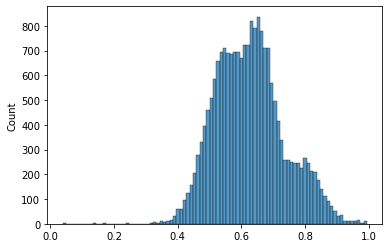

In [21]:
#Plot  our TestRank Rouge-n score distribution 
TextRankSummaryrougeF1Score=[]
for i in range(0,len(newsDF['Summary (TestRank)'].values)):
    TextRankSummaryrougeF1Score.append(rouge_n(newsDF['Summary (TestRank)'].values[i],newsDF['Cleaned_Abstract'].values[i]).get('f'))
    
sns.histplot(TextRankSummaryrougeF1Score);

Similar to TextRank , there is LexRank algorithm which perform summarization.

## LexRank

Along with TextRank , sumy has various other algorithms to summarize text.
In this section, I shall discuss on implementation of the LexRank algorithm for summarization using sumy.

A sentence which is similar to many other sentences of the text has a high probability of being important. The approach of LexRank is that a particular sentence is recommended by other similar sentences and hence is ranked higher.Higher the rank, higher is the priority of being included in the summarized text.


In [22]:
# Importing the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
# Import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

We import PlaintextParser since we have a article stored as a string hence we use it Along with parser, you have to import Tokenizer for segmenting the raw text into tokens.

As the text source here is a string, you need to use PlainTextParser.from_string() function to initialize the parser. You can specify the language used as input to the Tokenizer.

In [23]:
#Applying LexRank on data
newsDF['Summary (LexRank)'] = newsDF["Cleaned_Article"].apply(make_summarizer(LexRankSummarizer() ))

## Sample of our Result
### Article " It's been Orlando's hottest October ever so far, but cooler temperatures on the way "
there won’t be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits . halloween temperatures are supposed to come near or tie the record for the hottest halloween in orlando , but the month of october has already beaten the record for the hottest october ever recorded in the city beautiful , according to the national weather service . the record to beat was an average of 802 degrees with two days remaining 2019′s october is on track to record 809 degrees , said nws meteorologist derrick weitlich . yeah with just two days left , there’s no way it won’t break the record . this october has been above normal , weitlich said . daytona and vero beach are also expected to hit record breaking months . so why is it so hot was central florida cursed by a coven of witches the answer is less magical and more meteorological as a ridge , or an area of blocking high pressure , has been sitting over florida preventing frontal passages of cooler air from entering , weitlich said . that’s been the trend this month , he said . so while the central us . gets colder temperatures , we’re getting warmer than normal . the hottest halloween on record came in 1992 when pumpkins wilted in the heat of 90 degrees . this halloween is expected to hit a temperature of 89 degrees , but the possibility for hotter temperatures does exist , weitlich said . this week’s forecast isn’t all heat though . cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning . saturday night should see lows in the mid 60s , weitlich said . but temperatures are expected to return to the 80s by monday . we’ll get , at least , a taste of fall , weitlich said .' 

...........................................................................................................................................................................................................................................
### Summary (LexRank)
'this october has been above normal , weitlich said .cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning .'
...........................................................................................................................................................................................................................................
### Our Abstract Ref

'there will not be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits .'

In [8]:
#newsDF.to_pickle('./dataset/LexRankSummary.p')
newsDF=pd.read_pickle("./dataset/LexRankSummary.p")
newsDF

,News ID,Category,SubCategory,Title,Abstract,URL,Article,Cleaned_Article,Cleaned_Abstract,Summary (TestRank),Summary (LexRank)
0,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,[Video by Health.com]\nWhat are skin tags?\nAs...,video by what are skin tags as you get older ...,"they seem harmless , but there is a very good ...",many people will look up how to get rid of ski...,many people will look up how to get rid of ski...
1,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,https://assets.msn.com/labs/mind/AAJ4lap.html,The officiating in the Packers' 23-22 Monday n...,the officiating in the packers 23 22 monday ni...,several fines came down against nfl players fo...,"this season , there are multiple aspects of th...","interestingly enough , the league did not fine..."
2,N49186,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,https://assets.msn.com/labs/mind/AAJwoxD.html,There won’t be a chill down to your bones this...,there won’t be a chill down to your bones this...,there will not be a chill down to your bones t...,halloween temperatures are supposed to come ne...,"this october has been above normal , weitlich ..."
3,N39237,news,newsscienceandtechnology,"How to report weather-related closings, delays","When there are active closings, view them here...",https://assets.msn.com/labs/mind/AAlErhA.html,"When there are active closings, view them here...","when there are active closings , view them her...","when there are active closings , view them her...",how to obtain a code if your organization want...,"before you can enter information , you need a ..."
4,N28361,health,wellness,Instagram Filters with Plastic Surgery-Inspire...,In an effort to combat some of the negative me...,https://assets.msn.com/labs/mind/AAJaBOM.html,"Instagram filters, especially the stylish ones...","instagram filters , especially the stylish one...",in an effort to combat some of the negative me...,the post further explained that any filters as...,"however , in an effort to combat some of the n..."
...,...,...,...,...,...,...,...,...,...,...,...
19983,N5027,news,newsscienceandtechnology,NEW DETAILS: Wright Brothers airport eyes grow...,Dayton-Wright Brothers Airport is in the midst...,https://assets.msn.com/labs/mind/BBWzD00.html,Dayton-Wright Brothers Airport is in the midst...,dayton wright brothers airport is in the midst...,dayton wright brothers airport is in the midst...,"driving the expansion , according to those in ...",the business growth around the austin intercha...
19984,N64760,news,newsoffbeat,Supermarket magnate John Catsimatidis offers $...,It might take Cats to catch a heartless feline...,https://assets.msn.com/labs/mind/BBWzD8P.html,It might take Cats to catch a heartless feline...,it might take cats to catch a heartless feline...,it might take cats to catch a heartless feline...,"let’s put out a 1,000 reward , which we’ll be ...","sliwa , meanwhile , said on catsimatidis’radio..."
19985,N23858,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...,https://assets.msn.com/labs/mind/BBWzQB8.html,When the U.S. women's national soccer team arr...,when the us . women s national soccer team arr...,when the us . women s national soccer team arr...,"women s national team , i think they are the s...",women s national team has put up an impressive...
19986,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"MALIBU, CA — November 8, 2019, marked the one-...","malibu , ca november 8 , 2019 , marked the one...",woolsey fire anniversary a community is foreve...,"while the firefighters raced to t

let's look at our LexRank Rouge-n score distribution

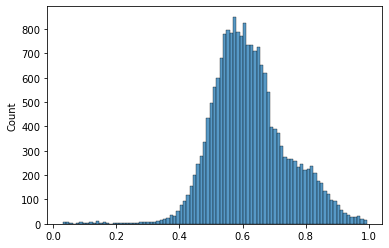

In [25]:
#plot our LexRank Rouge-n score distribution
LexRankSummaryrougeF1Score=[]
for i in range(0,len(newsDF['Summary (LexRank)'].values)):
    LexRankSummaryrougeF1Score.append(rouge_n(newsDF['Summary (LexRank)'].values[i],newsDF['Cleaned_Abstract'].values[i]).get('f'))
    
sns.histplot(LexRankSummaryrougeF1Score);

It's time to compare TextRank with LexRank based on their Rouge score.

In [26]:
rouge = Rouge()

text_rank_scores = rouge.get_scores(newsDF['Summary (TestRank)'],newsDF['Cleaned_Abstract'], avg=True)
lex_rank_scores = rouge.get_scores(newsDF['Summary (LexRank)'],newsDF['Cleaned_Abstract'], avg=True)

text_rank_scores_df = pd.DataFrame(text_rank_scores)
lex_rank_scores_df = pd.DataFrame(lex_rank_scores)

scores_df = text_rank_scores_df.join(lex_rank_scores_df, lsuffix=' (TextRank)', rsuffix=' (LexRank)').sort_index(axis=1)
scores_df

,rouge-1 (LexRank),rouge-1 (TextRank),rouge-2 (LexRank),rouge-2 (TextRank),rouge-l (LexRank),rouge-l (TextRank)
r,0.377688,0.395245,0.173440,0.169552,0.325713,0.336315
p,0.318764,0.255541,0.149315,0.112100,0.281046,0.222444
f,0.319845,0.291429,0.146347,0.125472,0.279234,0.251571


# Abstractive Text Summarization

Abstractive summarization is the new state of art method, which generates new sentences that could best represent the whole text. This is better than extractive methods where sentences are just selected from original text for the summary.

Some common abstractive models are :
- GPT-2
- GPT-3
- BERT 
- OpenAI
- GPT
- T5
- BART

An awesome feature with transformers is that it provides PreTrained models with weights that can be easily instantiated through from_pretrained() method.
In this section we will discuss on BART transformer implementation. 


##  BART Transformer

BART is an encoder-decoder model. It converts all language problems into a text-to-text format.

In [27]:
## install packages 
# !pip install pytorch_lightning 
# !pip install nlp
# !pip install transformers
# !pip install sentencepiece
# !pip install --upgrade pip
# !pip install transformers[sentencepiece]


In [5]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch


In [6]:
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

In [ ]:
BartsummaryDict={}

In [ ]:
i=0

for text in newsDF['Cleaned_Article'].values[:2000]:
    inputs = tokenizer([text], padding=True, truncation=True, max_length=512,return_tensors="pt") # change max_length for shorter summaries
    outputs = model.generate(inputs['input_ids'], num_beams=4, max_length=80, early_stopping=True)
    BartsummaryDict[text] = " ".join([tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=False) for output in outputs])

    i+=1
    if i % 250 == 0:
        print(i)


250
500
750
1000


In [ ]:
BARTSummary=pd.DataFrame(list(BartsummaryDict.items()), columns=['Cleaned_Article', 'BARTSummary'])
BARTSummary.shape

## Sample of our Result
### Article " It's been Orlando's hottest October ever so far, but cooler temperatures on the way "
there won’t be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits . halloween temperatures are supposed to come near or tie the record for the hottest halloween in orlando , but the month of october has already beaten the record for the hottest october ever recorded in the city beautiful , according to the national weather service . the record to beat was an average of 802 degrees with two days remaining 2019′s october is on track to record 809 degrees , said nws meteorologist derrick weitlich . yeah with just two days left , there’s no way it won’t break the record . this october has been above normal , weitlich said . daytona and vero beach are also expected to hit record breaking months . so why is it so hot was central florida cursed by a coven of witches the answer is less magical and more meteorological as a ridge , or an area of blocking high pressure , has been sitting over florida preventing frontal passages of cooler air from entering , weitlich said . that’s been the trend this month , he said . so while the central us . gets colder temperatures , we’re getting warmer than normal . the hottest halloween on record came in 1992 when pumpkins wilted in the heat of 90 degrees . this halloween is expected to hit a temperature of 89 degrees , but the possibility for hotter temperatures does exist , weitlich said . this week’s forecast isn’t all heat though . cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s , and the low could be in the low 70s by saturday morning . saturday night should see lows in the mid 60s , weitlich said . but temperatures are expected to return to the 80s by monday . we’ll get , at least , a taste of fall , weitlich said .' 

...........................................................................................................................................................................................................................................
### Summary (BART)
'The month of october has already beaten the record for the hottest october ever recorded in the city beautiful. The hottest halloween on record came in 1992 when pumpkins wilted in the heat of 90 degrees. cooler temperatures are expected to start this weekend where the high is forecast to be in the upper 70s.'
...........................................................................................................................................................................................................................................
### Our Abstract Ref

'there will not be a chill down to your bones this halloween in orlando , unless you count the sweat dripping from your armpits .'


In [ ]:
newsDF.to_pickle('./dataset/BARTSummary.p')
newsDF=pd.read_pickle("./dataset/BARTSummary.p")

let's look at our LexRank Rouge-n score distribution

In [ ]:
#plot our LexRank Rouge-n score distribution
LexRankSummaryrougeF1Score=[]
for i in range(0,len(BARTSummary['BARTSummary'].values)):
    LexRankSummaryrougeF1Score.append(rouge_n(BARTSummary['BARTSummary'].values[i],newsDF['Cleaned_Abstract'].values[i]).get('f'))
    
sns.histplot(LexRankSummaryrougeF1Score);

In [ ]:
from rouge import Rouge
rouge = Rouge()
BART_scores = rouge.get_scores(BARTSummary['BARTSummary'],newsDF['Cleaned_Abstract'], avg=True)
BART_scores_df = pd.DataFrame(BART_scores)
BART_scores_df
